In [17]:
from db.database import Database
db = Database()
import numpy as np
import pandas as pd
from util.text_manipulation import remove_html
import json

In [2]:
with db.engine.connect() as conn:
    bp_df = pd.read_sql_table("blueprints_filtered", conn)
_rel_topics = bp_df["topic_id"].unique().tolist()
topics = {topic.topic_id: topic for topic in db.get_topics()}
posts = {post.post_id: post for post in db.get_posts()}
posts_df = pd.DataFrame([{_attr: getattr(post, _attr) for _attr in post.__dict__.keys()
                        } for post in posts.values()])
topics_df = pd.DataFrame([{_attr: getattr(topic, _attr) for _attr in topic.__dict__.keys()
                        } for topic in topics.values()])
topics_df = topics_df[topics_df["topic_id"].isin(_rel_topics)]
posts_df = posts_df[posts_df["topic_id"].isin(_rel_topics)]

In [3]:
bp_df.head()

,blueprint_url,blueprint_code,post_id,description,topic_keywords,keywords_tfidf,id,blueprint_hash,name,extracted_keywords,keywords_yake,topic_title,topic_id,tags,created_at,post_content
0,https://community.home-assistant.io//t/nag-pro...,blueprint:\n name: Nag prompt blueprint\n de...,1220860,Nag a mobile device to do something,"{""android"": 0.04282333988128355, ""user"": 0.042...","{""nag"": 0.6591492709484212, ""prompt"": 0.237436...",1,2f523787adf856fbddd08b2f7b32aa2490eb48a236bc68...,Nag prompt blueprint,"{""input__input_boolean"": 2}","{""android"": 0.04282333988128355, ""user"": 0.042...",Nag prompt Blueprint (Android Notification),255041,[],2020-12-14 01:40:32.358,<p>This blueprints creates configurable nag no...
1,https://community.home-assistant.io//t/inovell...,blueprint:\n name: Inovelli \n description: ...,1220678,Use this blueprint to create automations based...,"{""inovelli"": 0.027025502281732554, ""create"": 0...","{""inovelli"": 0.49285018857218027, ""lzw36"": 0.4...",2,ca6a74b04fac9cee0925adfe7cb03c8beb0354a816fa66...,Inovelli,{},"{""inovelli"": 0.027025502281732554, ""create"": 0...",Inovelli LZW36 Fan/Dimmer Scenes,254999,"[""blueprint""]",2020-12-13 22:32:38.158,<p>This blueprint allows you to easily create ...
2,https://community.home-assistant.io//t/deconz-...,blueprint:\n name: deCONZ - IKEA five button ...,1223455,Control anything using IKEA five button remote\n,"{""short"": 0.01649244354775234, ""long"": 0.01649...","{""button"": 0.4699242472830788, ""five"": 0.35503...",3,c5f67655e23dff66b1042d3b38e967d74dad01a4a3d589...,deCONZ - IKEA five button remote,"{""input__deconz"": 1}","{""short"": 0.01649244354775234, ""long"": 0.01649...",deCONZ - IKEA five button remote,255699,"[""switch"", ""blueprint"", ""deconz""]",2020-12-15 12:18:15.898,"<p>This is a mix of <a href=""https://community..."
3,https://community.home-assistant.io//t/set-hea...,blueprint:\n name: Heat for certain time\n d...,1223628,Turn on heating for a given amount of time.,"{""set"": 0.055741499059047184, ""temperature"": 0...","{""heat"": 0.34881772060990424, ""heating"": 0.334...",4,00b1c4d2e847ed9451c8e8d1acfbbcd5e1740f9991226d...,Heat for certain time,"{""input__input_datetime"": 1, ""input__climate"": 2}","{""set"": 0.055741499059047184, ""temperature"": 0...",Set heating temperature to a configurable valu...,255742,[],2020-12-15 14:23:53.414,"<p>This is a blueprint, that allows to set the..."
4,https://community.home-assistant.io//t/light-a...,blueprint:\n name: Light Allowance\n descrip...,1224871,Turns a light off after an allotted time,"{""time"": 0.11369206228658875, ""light"": 0.13453...","{""allotted"": 0.6327468890387052, ""allowance"": ...",5,0dd0ec70d42f2e8a428ae7a2934852dbec0beb34cd03cc...,Light Allowance,"{""input__light"": 1, ""output__light"": 1}","{""time"": 0.11369206228658875, ""light"": 0.13453...",Light Allowance,256045,[],2020-12-16 04:23:36.519,<p>This blueprint will turn a light off after ...


In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def plot_wordcloud(keywords):
    wordcloud = WordCloud().generate(" ".join(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
import re
import json

def process_bp_keywords(kwd_dict: dict[str, int] | str) -> list[str] | None:
    if isinstance(kwd_dict, str):
        kwd_dict = json.loads(kwd_dict)
    
    kwd_list = list(kwd_dict.keys())
    if kwd_list.__len__() < 1:
        return None
    
    kwds = []
    
    for kwd in kwd_list:
        in_out = re.search(r"(input__|output__)(input_|output_)?", kwd)
        kwd = kwd.removeprefix(in_out.group()) if in_out else kwd
        kwds.append(kwd)
    return kwds

In [6]:
bp_df["processed_keywords"] = bp_df["extracted_keywords"].apply(process_bp_keywords)  
bp_df.head()

Keyword list: {'input__input_boolean': 2}
Original keyword: input__input_boolean
Keyword list: {'input__deconz': 1}
Original keyword: input__deconz
Keyword list: {'input__input_datetime': 1, 'input__climate': 2}
Original keyword: input__input_datetime
Original keyword: input__climate
Keyword list: {'input__light': 1, 'output__light': 1}
Original keyword: input__light
Original keyword: output__light
Keyword list: {'input__sensor': 1}
Original keyword: input__sensor
Keyword list: {'output__climate': 1}
Original keyword: output__climate
Keyword list: {'input__binary_sensor': 1, 'output__camera': 1}
Original keyword: input__binary_sensor
Original keyword: output__camera
Keyword list: {'input__person': 10, 'input__time': 1, 'input__automation': 2, 'input__zone': 4}
Original keyword: input__person
Original keyword: input__time
Original keyword: input__automation
Original keyword: input__zone
Keyword list: {'input__deconz': 1, 'output__media_player': 7}
Original keyword: input__deconz
Origina

,blueprint_url,blueprint_code,post_id,description,topic_keywords,keywords_tfidf,id,blueprint_hash,name,extracted_keywords,keywords_yake,topic_title,topic_id,tags,created_at,post_content,processed_keywords
0,https://community.home-assistant.io//t/nag-pro...,blueprint:\n name: Nag prompt blueprint\n de...,1220860,Nag a mobile device to do something,"{""android"": 0.04282333988128355, ""user"": 0.042...","{""nag"": 0.6591492709484212, ""prompt"": 0.237436...",1,2f523787adf856fbddd08b2f7b32aa2490eb48a236bc68...,Nag prompt blueprint,"{""input__input_boolean"": 2}","{""android"": 0.04282333988128355, ""user"": 0.042...",Nag prompt Blueprint (Android Notification),255041,[],2020-12-14 01:40:32.358,<p>This blueprints creates configurable nag no...,[boolean]
1,https://community.home-assistant.io//t/inovell...,blueprint:\n name: Inovelli \n description: ...,1220678,Use this blueprint to create automations based...,"{""inovelli"": 0.027025502281732554, ""create"": 0...","{""inovelli"": 0.49285018857218027, ""lzw36"": 0.4...",2,ca6a74b04fac9cee0925adfe7cb03c8beb0354a816fa66...,Inovelli,{},"{""inovelli"": 0.027025502281732554, ""create"": 0...",Inovelli LZW36 Fan/Dimmer Scenes,254999,"[""blueprint""]",2020-12-13 22:32:38.158,<p>This blueprint allows you to easily create ...,None
2,https://community.home-assistant.io//t/deconz-...,blueprint:\n name: deCONZ - IKEA five button ...,1223455,Control anything using IKEA five button remote\n,"{""short"": 0.01649244354775234, ""long"": 0.01649...","{""button"": 0.4699242472830788, ""five"": 0.35503...",3,c5f67655e23dff66b1042d3b38e967d74dad01a4a3d589...,deCONZ - IKEA five button remote,"{""input__deconz"": 1}","{""short"": 0.01649244354775234, ""long"": 0.01649...",deCONZ - IKEA five button remote,255699,"[""switch"", ""blueprint"", ""deconz""]",2020-12-15 12:18:15.898,"<p>This is a mix of <a href=""https://community...",[deconz]
3,https://community.home-assistant.io//t/set-hea...,blueprint:\n name: Heat for certain time\n d...,1223628,Turn on heating for a given amount of time.,"{""set"": 0.055741499059047184, ""temperature"": 0...","{""heat"": 0.34881772060990424, ""heating"": 0.334...",4,00b1c4d2e847ed9451c8e8d1acfbbcd5e1740f9991226d...,Heat for certain time,"{""input__input_datetime"": 1, ""input__climate"": 2}","{""set"": 0.055741499059047184, ""temperature"": 0...",Set heating temperature to a configurable valu...,255742,[],2020-12-15 14:23:53.414,"<p>This is a blueprint, that allows to set the...","[datetime, climate]"
4,https://community.home-assistant.io//t/light-a...,blueprint:\n name: Light Allowance\n descrip...,1224871,Turns a light off after an allotted time,"{""time"": 0.11369206228658875, ""light"": 0.13453...","{""allotted"": 0.6327468890387052, ""allowance"": ...",5,0dd0ec70d42f2e8a428ae7a2934852dbec0beb34cd03cc...,Light Allowance,"{""input__light"": 1, ""output__light"": 1}","{""time"": 0.11369206228658875, ""light"": 0.13453...",Light Allowance,256045,[],2020-12-16 04:23:36.519,<p>This blueprint will turn a light off after ...,"[light, light]"


In [ ]:
def preprocess(text):
    text = remove_html(text)
    text = text.lower()
    text = re.sub(r"’", r"'", text)
    return text

### Rake

In [19]:
from rake_nltk import Rake

rake = Rake(max_length=2)

def extract_keyphrases(sentences: list[str]) -> list[str]:
    rake.extract_keywords_from_sentences(sentences)
    return rake.get_ranked_phrases()

In [36]:
topic = topics_df.iloc[115]
posts_in_topic = posts_df[posts_df["topic_id"] == topic["topic_id"]]
bps_in_topic = bp_df[bp_df["topic_id"] == topic["topic_id"]]

tags = topic["tags"]
proc_keywords = bps_in_topic["processed_keywords"].tolist()
proc_keywords = [kwd for sublist in proc_keywords if sublist for kwd in sublist]
tags_set = set(tags)
rake.stopwords = Rake().stopwords.union({"blueprint", "home assistant", "automation"} | tags_set | set(keywords))
                                         

text = [preprocess(topic["title"])]
for post in posts_in_topic["cooked"].tolist():
    text.append(preprocess(post))
for bp in bps_in_topic["description"].tolist():
    text.append(preprocess(bp))
keywords = extract_keyphrases(text)
print(keywords)

['triple clicks', 'similar except', 'several times', 'really like', 'please give', 'patient seems', 'normal automation', 'next step', 'many times', 'line 33', 'latest version', 'latest version', 'latest firmware', 'ikea tradfri', 'home assistnt', 'home assistant', 'home assistant', 'home assistant', 'early stage', 'directly control', 'didnt heal', 'dev tools', 'dev tools', 'could se', 'copy url', 'column 31', 'choose condition', 'cheers linton', 'battery level', '1s delay', '100 %)', 'shortcut button', 'shortcut button', 'shortcut button', 'shortcut button', 'shortcut button', 'shortcut button', 'particular button', 'homeassistant button', 'two hours', 'new devices', 'events …', 'debugging events', 'phoscon interface', 'phoscon beta', 'works perfectly', 'works perfectly', 'working like', 'wont show', 'set mode', 'please help', 'first adding', 'work properly', 'work good', 'deconz integration', 'deconz addon', 'via devices', 'error message', 'already added', 'phoscon app', 'phoscon app'

TypeError: asarray() got an unexpected keyword argument 'copy'

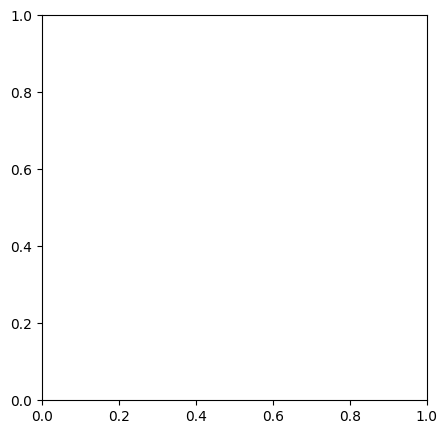

In [22]:
plot_wordcloud(keywords)

### Yake

In [37]:
import yake
yake_kw = yake.KeywordExtractor()
yake_kw.stopword_set = yake_kw.stopword_set.union({"blueprint", "home", "assistant", "automation"} | tags_set | set(proc_keywords))

text = ". ".join(text)

_keywords = yake_kw.extract_keywords(text)

keywords = {kwd: score for kwd, score in _keywords}
print(keywords)

{'shortcut button': 0.013559100127269364, 'button': 0.019303165332630882, 'shortcut': 0.031240300642995888, 'tradfri shortcut button': 0.0328792773534967, 'events': 0.0527043770098349, 'phoscon': 0.058175765308517986, 'add': 0.05939839702083419, 'work': 0.0643173343473847, 'tradfri shortcut': 0.07415934422795514, 'add shortcut button': 0.08523401135614436, 'works': 0.09004426808633857, 'ikea tradfri shortcut': 0.09631847343775343, 'tradfri': 0.10591761123130612, 'ikea tradfri': 0.10609836368968636, 'device': 0.11175512255756914, 'ikea': 0.14065025852739266, 'devices': 0.14900683007675886, 'shortcut buttons support': 0.15303770525591548, 'added': 0.15687104563681276, 'event': 0.15811313102950472}


In [38]:
from tqdm import tqdm
from collections import Counter

kw_counter = Counter()

for _, topic in tqdm(topics_df.iterrows(), total=topics_df.shape[0]):
    posts_in_topic = posts_df[posts_df["topic_id"] == topic["topic_id"]]
    bps_in_topic = bp_df[bp_df["topic_id"] == topic["topic_id"]]

    yake_kw = yake.KeywordExtractor()
    tags_set = set(topic["tags"])
    proc_keywords = bps_in_topic["processed_keywords"].tolist()
    proc_keywords = [kwd for sublist in proc_keywords if sublist for kwd in sublist]
    yake_kw.stopword_set = yake_kw.stopword_set.union({"blueprint", "home", "assistant", "automation"} | tags_set | set(proc_keywords))

    text = [preprocess(topic["title"])]
    for post in posts_in_topic["cooked"].tolist():
        text.append(preprocess(post))
    for bp in bps_in_topic["description"].tolist():
        text.append(preprocess(bp))
    
    text = ". ".join(text)
    _keywords = yake_kw.extract_keywords(text)
    keywords = [kwd for kwd, score in _keywords]
    
    kw_counter.update(keywords[0:3])

100%|██████████| 1183/1183 [02:47<00:00,  7.08it/s]


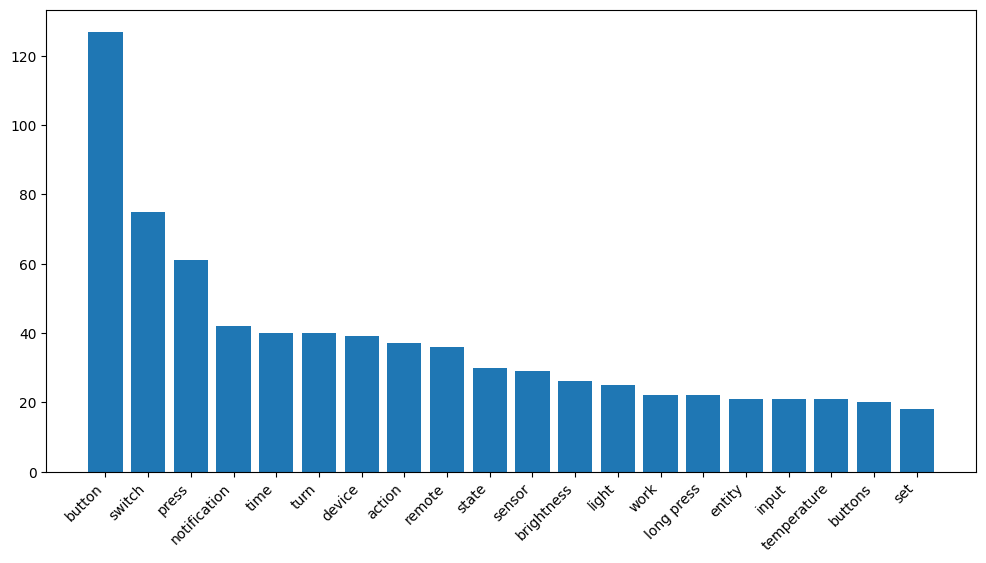

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(*zip(*kw_counter.most_common(20)))
plt.xticks(rotation=45, ha="right")
plt.show()